# Data Quality Assessment - Sprocket Central Pty Ltd

In [1]:
import pandas as pd

##  CustomerDemographic

In [2]:
# Import data
df_demographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic', skiprows=[0])

In [3]:
# Overview
df_demographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [4]:
# Missing values + data types + memory usage
df_demographic.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

##### Customer id: duplicated values, removed values, range

In [5]:
# Duplicated values
print('Duplicated values:', df_demographic.customer_id.duplicated().sum())
# Removed values
print('No removed values') if not (df_demographic.customer_id.diff()>1).sum() else print('Some removed values')
# Range
print('Range:', df_demographic.customer_id.min(), 'to', df_demographic.customer_id.max())

Duplicated values: 0
No removed values
Range: 1 to 4000


##### Name and Last name are not too much relevant for the analysis, as well as Deceased indicator

In [6]:
# Drop first and last name
df_demographic.drop(columns=['first_name', 'last_name', 'deceased_indicator'], inplace=True)

##### Default column is full of errors, probably comming from encoding

In [7]:
df_demographic.drop(columns=['default'], inplace=True)

### Numerical variables

In [8]:
# Description
df_demographic.drop(columns=['customer_id']).describe()

,past_3_years_bike_related_purchases,tenure
count,4000.000000,3913.000000
mean,48.890000,10.657041
std,28.715005,5.660146
min,0.000000,1.000000
25%,24.000000,6.000000
50%,48.000000,11.000000
75%,73.000000,15.000000
max,99.000000,22.000000


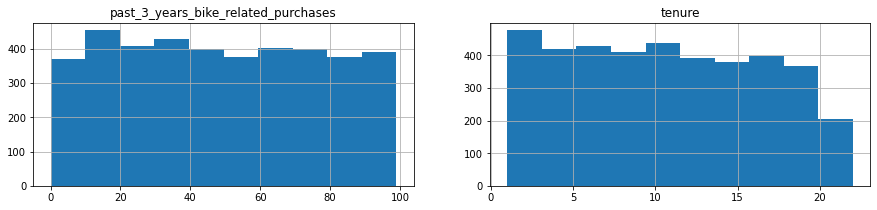

In [9]:
# Distributions
import matplotlib.pyplot as plt
plt.figure(figsize = (15,3))
plt.subplot(1,2,1); plt.title('past_3_years_bike_related_purchases')
df_demographic.past_3_years_bike_related_purchases.hist()
plt.subplot(1,2,2); plt.title('tenure')
df_demographic.tenure.hist()
plt.show()

##### Tenure and DOB have missing values on the same customers?

In [10]:
# All missing values of tenure match the ones from DOB
df_demographic.loc[df_demographic.tenure.isna(), ['DOB', 'tenure']].isna().all()

DOB       True
tenure    True
dtype: bool

##### Drop tenure and DOB missing values

In [11]:
# Drop since they are just 87 out of 4000 (~2%) samples
df_demographic.drop(df_demographic.index[df_demographic.tenure.isna()], inplace = True)
# Reset indexes
df_demographic.reset_index(drop=True, inplace=True)

### Datetime variables

In [12]:
# Value counts ordered to see the years
df_demographic.DOB.dt.year.value_counts().sort_index()

1843      1
1931      1
1935      1
1940      1
1943      1
1944      1
1953     19
1954     61
1955     58
1956     63
1957     71
1958     55
1959     94
1960     58
1961     60
1962     76
1963     59
1964     85
1965     69
1966     65
1967     73
1968     69
1969     78
1970     57
1971     88
1972     54
1973    122
1974    152
1975    114
1976    152
1977    204
1978    217
1979    118
1980    123
1981     79
1982     41
1983     40
1984     43
1985     91
1986    114
1987     72
1988     72
1989     74
1990     53
1991     48
1992     74
1993     60
1994     79
1995     90
1996     67
1997     74
1998     80
1999     60
2000     42
2001     34
2002      6
Name: DOB, dtype: int64

##### Drop DOB error value

In [13]:
# Drop since it is just one value
df_demographic.drop(df_demographic.index[df_demographic.DOB.dt.year == 1843], inplace = True)
# Reset indexes
df_demographic.reset_index(drop=True, inplace=True)

##### Create Age feature and drop DOB

In [14]:
# Age feature
import datetime
df_demographic['Age'] = (datetime.datetime.today().year-df_demographic.DOB.dt.year).values

# Drop DOB
df_demographic.drop(columns=['DOB'], inplace=True)

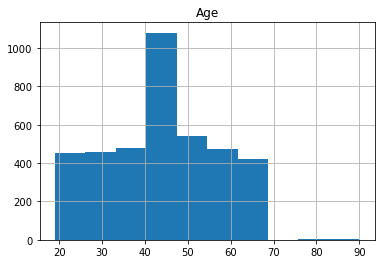

In [15]:
# Distribution of the new feature
plt.figure(); plt.title('Age')
df_demographic.Age.hist()
plt.show()

### Categorical variables

In [16]:
# Identify classes
for cat in ['gender', 'wealth_segment', 'owns_car']:
    print(cat.upper())
    print(df_demographic[cat].unique(),'\n')

GENDER
['F' 'Male' 'Female' 'Femal' 'M'] 

WEALTH_SEGMENT
['Mass Customer' 'Affluent Customer' 'High Net Worth'] 

OWNS_CAR
['Yes' 'No'] 



##### Gender typos

In [17]:
# Replace typos
df_demographic.gender = df_demographic.gender.replace(to_replace=['Female', 'Femal'], value='F')
df_demographic.gender = df_demographic.gender.replace(to_replace='Male', value='M')

##### Wealth segment relation with tenure

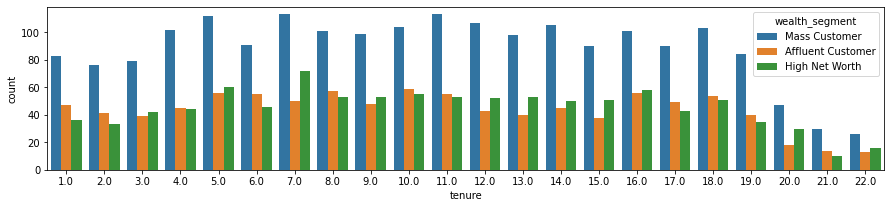

In [18]:
# Tenure countplot according the different wealth segments
import seaborn as sns
plt.figure(figsize=(15,3))
sns.countplot(data=df_demographic, x='tenure', hue='wealth_segment', )

In [19]:
# Tenure seems to not relate with wealth segment, and it seems that wealth segment could be more useful for client segmentation
df_demographic.drop(columns='tenure', inplace=True)

##### Job features classes

In [20]:
df_demographic.job_title.unique().tolist()

['Executive Secretary',
 'Administrative Officer',
 'Recruiting Manager',
 nan,
 'Senior Editor',
 'Media Manager I',
 'Business Systems Development Analyst',
 'Senior Quality Engineer',
 'Nuclear Power Engineer',
 'Developer I',
 'Account Executive',
 'Junior Executive',
 'Media Manager IV',
 'Sales Associate',
 'Professor',
 'Geological Engineer',
 'Project Manager',
 'Safety Technician I',
 'Research Assistant I',
 'Accounting Assistant III',
 'Editor',
 'Research Nurse',
 'Safety Technician III',
 'Staff Accountant III',
 'Legal Assistant',
 'Product Engineer',
 'Information Systems Manager',
 'VP Quality Control',
 'Social Worker',
 'Senior Cost Accountant',
 'Assistant Media Planner',
 'Payment Adjustment Coordinator',
 'Food Chemist',
 'Accountant III',
 'Director of Sales',
 'Senior Financial Analyst',
 'Registered Nurse',
 'Biostatistician II',
 'Computer Systems Analyst II',
 'Software Test Engineer II',
 'Paralegal',
 'VP Sales',
 'Chief Design Engineer',
 'Office Assistant 

In [21]:
# Drop job title column, since there are lot of different classes and may not arrive to any conclusion
df_demographic.drop(columns=['job_title'], inplace = True)

In [22]:
df_demographic.job_industry_category.unique().tolist()

['Health',
 'Financial Services',
 'Property',
 'IT',
 nan,
 'Retail',
 'Argiculture',
 'Manufacturing',
 'Telecommunications',
 'Entertainment']

In [23]:
# Fill missing values with a generic class
df_demographic.job_industry_category.fillna("n/a", inplace=True)

# Replace typo
df_demographic.job_industry_category = df_demographic.job_industry_category.replace(to_replace='Argiculture',
                                                                                    value='Agriculture')

_____________

## CustomerAddress

In [24]:
# Data importation
df_address = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress', skiprows=[0])

In [25]:
# Overview
df_address

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [26]:
# Missing values + memory usage + data type
df_address.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 879.0 KB


##### Customer id: duplicated values, removed customers

In [27]:
# Duplicated values
print('Duplicated values:', df_address.customer_id.duplicated().sum())

# Are all customer in order or are any of them removed?
print('Removed customers:', (df_address.customer_id.diff()-1).sum())

# Range
print('Range:', df_address.customer_id.min(), 'to', df_address.customer_id.max())

Duplicated values: 0
Removed customers: 4.0
Range: 1 to 4003


##### Address differentiation or drop (it probably do not interfere on the analysis)

In [28]:
# # Address type of road, street, avenue...
# df_address['addr_type'] = df_address.address.apply(lambda x: x.split()[-1])
# df_address.addr_type.unique()

In [29]:
# # Address street number or apartment number
# df_address['addr_number'] = df_address.address.apply(lambda x: x.split()[0])

# # Uncomment to watch a complete list of all the numbers and check if they are all numbers
# # df_address.addr_number.unique().tolist()

In [30]:
# # Address name
# df_address['addr_name'] = df_address.address.apply(lambda x: " ".join(x.split()[1:-1]))

In [31]:
# Drop previous address column
df_address.drop(columns=['address'], inplace = True)

##### Postcode range and values

In [32]:
# Postcode range 
print('Postcode range from', df_address.postcode.min(), 'to', df_address.postcode.max())

Postcode range from 2000 to 4883


In [33]:
# Look at the counts of each unique value
df_address.postcode.value_counts()

2170    31
2155    30
2145    30
2153    29
2770    26
        ..
4552     1
4555     1
2485     1
3580     1
4421     1
Name: postcode, Length: 873, dtype: int64

In [34]:
# For a deeper analysis on specific region, postcode could be used. However, since there is a state feature, the analysis would
# be more comprehensible and easy using that feature instead of postcode.
df_address.drop(columns='postcode', inplace=True)

##### State classes

In [35]:
# Is there any error or typo in Australia states?
df_address.state.unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [36]:
# Replaces typos
df_address.state = df_address.state.replace(to_replace='Victoria', value='VIC')
df_address.state = df_address.state.replace(to_replace='New South Wales', value='NSW')

##### Country classes

In [37]:
# How many countries are there? Is there any error?
df_address.country.unique()

array(['Australia'], dtype=object)

In [38]:
# Since only exist Australia it do not add value to the analysis
df_address.drop(columns='country', inplace=True)

___________

## Merge tables with inner join

In [39]:
customer_list = pd.merge(df_demographic,df_address,on='customer_id')

##### Wealth segment relation with property valuation

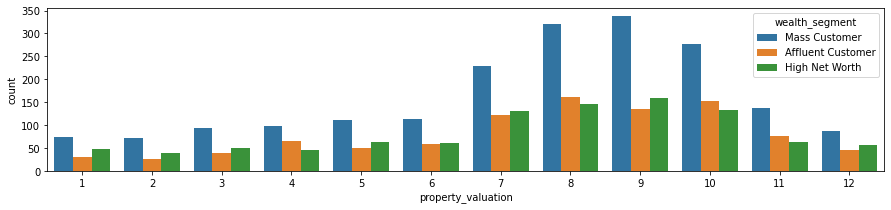

In [40]:
# Tenure countplot according the different wealth segments
import seaborn as sns
plt.figure(figsize=(15,3))
sns.countplot(data=customer_list, x='property_valuation', hue='wealth_segment')

________

## Transactions

In [41]:
# Import data
df_transactions = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions', skiprows=[0])

In [42]:
# Overview
df_transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


##### Customer id filtering

In [43]:
# Removed transactions done by customers that are not in the registered in the master table
df_transactions = df_transactions.merge(customer_list.customer_id, on='customer_id')
# Order by transaction id
df_transactions = df_transactions.sort_values('transaction_id')
# Reset indexes
df_transactions.reset_index(drop=True, inplace=True)

In [44]:
# Missing values + memory usage + data type
df_transactions.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19513 entries, 0 to 19512
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19513 non-null  int64         
 1   product_id               19513 non-null  int64         
 2   customer_id              19513 non-null  int64         
 3   transaction_date         19513 non-null  datetime64[ns]
 4   online_order             19162 non-null  float64       
 5   order_status             19513 non-null  object        
 6   brand                    19327 non-null  object        
 7   product_line             19327 non-null  object        
 8   product_class            19327 non-null  object        
 9   product_size             19327 non-null  object        
 10  list_price               19513 non-null  float64       
 11  standard_cost            19327 non-null  float64       
 12  product_first_sold_date  19327 n

##### Transaction id: duplicated values

In [45]:
# Duplicated values
print('Duplicated values:', df_transactions.transaction_id.duplicated().sum())

Duplicated values: 0


##### Are the same missing values in brand, product line, class and size, standard cost and product first sold date?

In [46]:
# Auxiliar list to contain all the columns
aux_list = ['brand', 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date']
# Visualize nans in brand for all these features
df_transactions.loc[df_transactions.brand.isna(), aux_list].isna().all()

brand                      True
product_line               True
product_class              True
product_size               True
standard_cost              True
product_first_sold_date    True
dtype: bool

In [47]:
# Classes of categorical features
for cat in aux_list[0:4]:
    print(cat.upper())
    print(df_transactions[cat].unique(),'\n')

BRAND
['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan] 

PRODUCT_LINE
['Standard' 'Road' 'Mountain' 'Touring' nan] 

PRODUCT_CLASS
['medium' 'low' 'high' nan] 

PRODUCT_SIZE
['medium' 'large' 'small' nan] 



##### Can the missing values be filled through the product id? 

In [48]:
# Visualize nans with product id
df_transactions.loc[df_transactions.brand.isna(), ['product_id']+aux_list]

,product_id,brand,product_line,product_class,product_size,standard_cost,product_first_sold_date
131,0,NaN,NaN,NaN,NaN,NaN,NaN
154,0,NaN,NaN,NaN,NaN,NaN,NaN
354,0,NaN,NaN,NaN,NaN,NaN,NaN
392,0,NaN,NaN,NaN,NaN,NaN,NaN
659,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
18867,0,NaN,NaN,NaN,NaN,NaN,NaN
18909,0,NaN,NaN,NaN,NaN,NaN,NaN
19308,0,NaN,NaN,NaN,NaN,NaN,NaN
19372,0,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Table for product id = 0, which corresponds to the missing values
df_transactions.loc[df_transactions.product_id==0]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
33,35,0,2171,2017-08-20,0.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0
38,40,0,2448,2017-11-28,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0
53,55,0,3140,2017-09-18,0.0,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
58,61,0,1839,2017-02-24,0.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,34244.0
79,83,0,3398,2017-04-01,1.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,37626.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,19922,0,1869,2017-01-06,1.0,Approved,Norco Bicycles,Road,medium,medium,543.39,407.54,37698.0
19454,19942,0,966,2017-07-30,1.0,Approved,OHM Cycles,Standard,low,medium,71.16,56.93,38647.0
19480,19968,0,2751,2017-04-06,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0
19500,19988,0,13,2017-04-05,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,42105.0


In [50]:
# Drop missing values samples since there is no way to accurately recover them
df_transactions.drop(df_transactions.index[df_transactions.brand.isna()], inplace=True)
# Reset indexes
df_transactions.reset_index(drop=True, inplace=True)

##### Does the same product id refer to different brands, lines, sizes, classes, etc?

In [51]:
# How many different brands correspond to each product?
for product in df_transactions.product_id.unique():
    print(len(df_transactions.loc[df_transactions.product_id==product, 'brand'].unique()))

2
1
1
1
1
2
2
2
2
2
2
2
2
1
2
1
1
2
2
2
2
2
2
1
2
6
1
2
1
2
1
2
1
2
2
2
1
2
2
2
1
1
2
2
2
2
2
1
2
2
2
2
2
2
1
2
1
2
2
2
2
2
1
1
1
2
1
1
2
1
2
2
2
1
2
2
2
2
2
2
2
1
1
1
1
1
1
2
2
2
1
1
2
1
1
1
2
1
2
2
1


In [52]:
# Drop product id since it is unclear or wrong its construction
df_transactions.drop(columns=['product_id'], inplace=True)

### Datetime variables

##### Transaction date: does contain some error?

In [53]:
# Years of the transactions
df_transactions.transaction_date.dt.year.value_counts()

2017    19327
Name: transaction_date, dtype: int64

In [54]:
# Distribution in months since it only contain only a year
df_transactions.transaction_date.dt.month.value_counts().sort_index()

1     1620
2     1584
3     1589
4     1595
5     1638
6     1523
7     1650
8     1690
9     1520
10    1719
11    1617
12    1582
Name: transaction_date, dtype: int64

In [55]:
# Create new variable month
df_transactions['month'] = df_transactions.transaction_date.dt.month

##### Product first sold date

In [56]:
# It is maybe encoded in days after de 30th Dec 1899
df_transactions.product_first_sold_date = \
df_transactions.product_first_sold_date.apply(lambda x: (datetime.datetime(1899, 12, 30) + \
                                                         datetime.timedelta(x)).strftime("%Y-%m-%d"))
# Data type
df_transactions.product_first_sold_date = pd.to_datetime(df_transactions.product_first_sold_date)
# Create new variable that counts the days from it is on sale until its bough
df_transactions['on_sale'] = df_transactions.transaction_date-df_transactions.product_first_sold_date

In [57]:
df_transactions.on_sale.describe()

count                        19327
mean     4715 days 11:30:18.533660
std      2874 days 17:03:51.034436
min               27 days 00:00:00
25%             2169 days 00:00:00
50%             4687 days 00:00:00
75%             7299 days 00:00:00
max             9840 days 00:00:00
Name: on_sale, dtype: object

In [58]:
# Drop column transaction date and on_sale column because the products were first sold too many days ago and there are only 
# transactions of 2017. Therefore it cannot be used to know if a client buys rapidly after the product is on sale or not
df_transactions.drop(columns=['transaction_date', 'on_sale'], inplace=True)

##### Online order: missing values

In [59]:
# Overview
df_transactions.loc[df_transactions.online_order.isna()]

,transaction_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,month
94,98,333,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,2003-07-21,6
159,167,3177,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,2005-05-10,4
162,170,404,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,2003-08-05,10
240,251,1967,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,2015-05-21,4
289,301,2530,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1997-01-25,3
...,...,...,...,...,...,...,...,...,...,...,...,...
18851,19515,690,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-21,1
18908,19574,1735,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,2013-03-12,1
18915,19581,1933,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,2012-06-04,10
18969,19636,1389,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,2004-01-16,7


In [60]:
# Look at the balance of both classes
df_transactions.online_order.value_counts()

1.0    9502
0.0    9476
Name: online_order, dtype: int64

In [61]:
# It can be assigned to each customer an online frequency by looking at the percentage of time he or she has bought online
online_freq = []
customers = df_transactions.loc[df_transactions.online_order.isna(),'customer_id'].unique()
for customer in customers:
    online_freq.append(df_transactions.loc[df_transactions.customer_id==customer,'online_order'].mean())
# If frequency is greater or equal than 0.5, or is nan, online order is assigned to 1. Else 0.
online_freq = [1 if (x>=0.5) | (x=='nan') else 0 for x in online_freq]

In [62]:
# Loop for customers with missing values and fill
for ind, customer in enumerate(customers):
    df_transactions.loc[df_transactions.customer_id==customer,'online_order'] = \
    df_transactions.loc[df_transactions.customer_id==customer,'online_order'].fillna(online_freq[ind])

### Categorical variables

In [63]:
for cat in ['order_status']+aux_list[0:4]:
    print(cat.upper())
    print(df_transactions[cat].value_counts(),'\n')

ORDER_STATUS
Approved     19152
Cancelled      175
Name: order_status, dtype: int64 

BRAND
Solex             4171
Giant Bicycles    3236
WeareA2B          3203
OHM Cycles        2976
Trek Bicycles     2914
Norco Bicycles    2827
Name: brand, dtype: int64 

PRODUCT_LINE
Standard    13851
Road         3871
Touring      1193
Mountain      412
Name: product_line, dtype: int64 

PRODUCT_CLASS
medium    13477
high       2945
low        2905
Name: product_class, dtype: int64 

PRODUCT_SIZE
medium    12685
large      3880
small      2762
Name: product_size, dtype: int64 



### Numerical variables

In [64]:
# Description
df_transactions.drop(columns=['transaction_id', 'customer_id', 'online_order']).describe()

,list_price,standard_cost,month
count,19327.000000,19327.000000,19327.000000
mean,1106.447654,555.749864,6.518032
std,582.891952,405.716005,3.449398
min,12.010000,7.210000,1.000000
25%,575.270000,215.140000,4.000000
50%,1163.890000,507.580000,7.000000
75%,1635.300000,795.100000,10.000000
max,2091.470000,1759.850000,12.000000


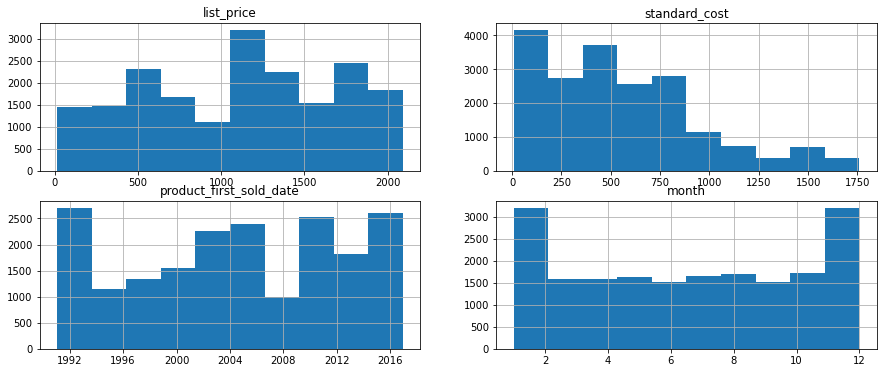

In [65]:
# Distributions
import matplotlib.pyplot as plt
plt.figure(figsize = (15,6))
plt.subplot(2,2,1); plt.title('list_price')
df_transactions.list_price.hist()
plt.subplot(2,2,2); plt.title('standard_cost')
df_transactions.standard_cost.hist()
plt.subplot(2,2,3); plt.title('product_first_sold_date')
df_transactions.product_first_sold_date.hist()
plt.subplot(2,2,4); plt.title('month')
df_transactions.month.hist()
plt.show()

In [66]:
# Check if there is always benefit on the transactions
import numpy as np
if np.sign(df_transactions.list_price-df_transactions.standard_cost).mean()==1:
    print('All transactions make profit')

All transactions make profit


##### Create benefit feature and drop list prices and standard cost as well as product first sold

In [67]:
# Benefit as the substraction of the standard cost to the list_price
df_transactions['profit'] = df_transactions.list_price-df_transactions.standard_cost

# Drop previous used features and product_first_sold_date 
df_transactions.drop(columns=['list_price','standard_cost', 'product_first_sold_date'], inplace=True)

---------------

## NewCustomerList

In [68]:
# Import data
df_new = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList', skiprows=[0])

In [69]:
# Overview
df_new

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.010000,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.650000,0.650000,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.79,0.7900,0.790000,0.790000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.76,0.7600,0.950000,0.807500,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,1.09,1.3625,1.362500,1.158125,997,997,0.357000


In [70]:
# Missing values + data types + memory usage
df_new.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

##### Drop of freatures not available in the training dataset

In [71]:
# Dropping unnamed columns and Rank and Value columns since it is unknown its value on the training dataset
df_new.drop(columns=df_new.columns[-7:], inplace=True)
# Dropping columns that already were eliminated on the training dataset
df_new.drop(columns=['first_name', 'last_name', 'country', 'deceased_indicator',
                     'tenure', 'postcode', 'job_title'], inplace=True)

### Datetime variables

##### Error and missing values

In [72]:
# Is there any outlier/error?
df_new.DOB.dt.year.sort_values().unique()

array([1938., 1939., 1940., 1941., 1942., 1943., 1944., 1945., 1946.,
       1947., 1948., 1949., 1950., 1951., 1952., 1953., 1954., 1955.,
       1956., 1957., 1958., 1959., 1960., 1961., 1962., 1963., 1964.,
       1965., 1966., 1967., 1968., 1969., 1970., 1971., 1972., 1973.,
       1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981., 1982.,
       1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990., 1991.,
       1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000.,
       2001., 2002.,   nan])

##### Drop DOB error value

In [73]:
#Overview
df_new.loc[df_new.DOB.isna()]

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,address,state,property_valuation
59,U,5,NaT,IT,Mass Customer,No,7232 Fulton Parkway,VIC,5
226,U,35,NaT,IT,Affluent Customer,Yes,6 Iowa Center,NSW,9
324,U,69,NaT,IT,Mass Customer,Yes,57025 New Castle Street,VIC,3
358,U,65,NaT,Entertainment,Affluent Customer,No,78 Clarendon Drive,QLD,8
360,U,71,NaT,IT,Mass Customer,Yes,5675 Burning Wood Trail,VIC,7
374,U,66,NaT,IT,Mass Customer,No,5773 Acker Way,QLD,6
434,U,52,NaT,IT,Mass Customer,No,72423 Surrey Street,VIC,5
439,U,93,NaT,IT,Mass Customer,Yes,3686 Waubesa Way,VIC,6
574,U,69,NaT,IT,Mass Customer,No,0307 Namekagon Crossing,NSW,7
598,U,15,NaT,IT,Affluent Customer,No,882 Toban Lane,NSW,11


In [74]:
# Drop since it is just one value
df_new.drop(df_new.index[df_new.DOB.isna()], inplace = True)
# Reset indexes
df_new.reset_index(drop=True, inplace=True)

##### Create Age feature and drop DOB

In [75]:
# Age feature
df_new['Age'] = (datetime.datetime.today().year-df_new.DOB.dt.year).values

# Drop DOB
df_new.drop(columns=['DOB'], inplace=True)

### Categorical Data

In [76]:
# Classes
cat = ['gender', 'wealth_segment', 'owns_car', 'state']
for col in cat:
    print(col.upper())
    print(df_new[col].unique(),'\n')

GENDER
['Male' 'Female'] 

WEALTH_SEGMENT
['Mass Customer' 'Affluent Customer' 'High Net Worth'] 

OWNS_CAR
['Yes' 'No'] 

STATE
['QLD' 'NSW' 'VIC'] 



##### Gender: class name consistency

In [77]:
# Replace Female and Male by F and M respectively
df_new.gender = df_new.gender.replace(to_replace='Female', value='F')
df_new.gender = df_new.gender.replace(to_replace='Male', value='M')

In [78]:
df_new.gender.value_counts()

F    513
M    470
Name: gender, dtype: int64

##### Job features classes

In [79]:
df_new.job_industry_category.unique().tolist()

['Manufacturing',
 'Property',
 'Financial Services',
 'Entertainment',
 'Retail',
 'IT',
 'Telecommunications',
 'Health',
 nan,
 'Argiculture']

In [80]:
# Fill missing values with a generic class
df_new.job_industry_category.fillna("n/a", inplace=True)

# Replace typo
df_new.job_industry_category = df_new.job_industry_category.replace(to_replace='Argiculture', value='Agriculture')

### Numerical variables

In [81]:
# Description
df_new.describe()

,past_3_years_bike_related_purchases,property_valuation,Age
count,983.000000,983.000000,983.000000
mean,49.824008,7.406918,50.206511
std,27.786108,2.758293,17.074268
min,0.000000,1.000000,19.000000
25%,27.000000,6.000000,38.000000
50%,51.000000,8.000000,49.000000
75%,72.000000,9.000000,64.000000
max,99.000000,12.000000,83.000000


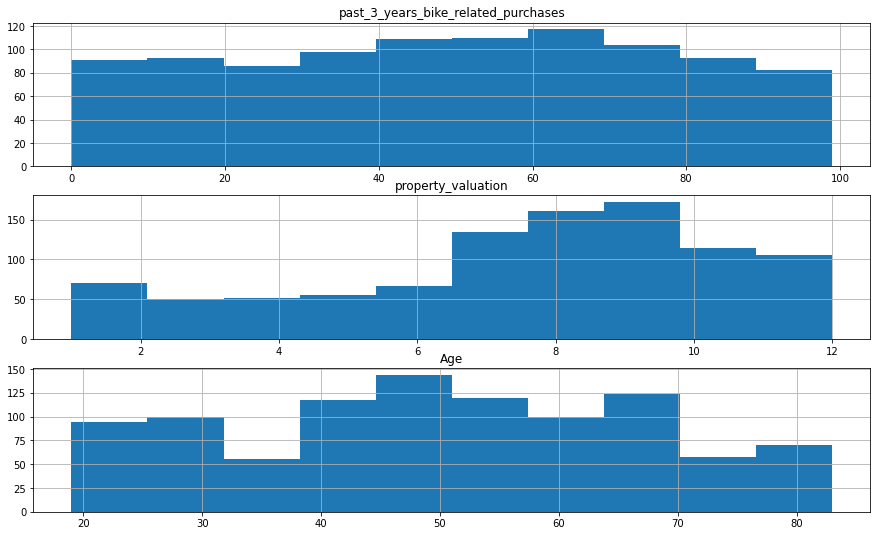

In [82]:
# Distributions
import matplotlib.pyplot as plt
plt.figure(figsize = (15,9))
plt.subplot(3,1,1); plt.title('past_3_years_bike_related_purchases')
df_new.past_3_years_bike_related_purchases.hist()
plt.subplot(3,1,2); plt.title('property_valuation')
df_new.property_valuation.hist()
plt.subplot(3,1,3); plt.title('Age')
df_new.Age.hist()
plt.show()

##### Address differentiation or drop since it do no interfere on the analysis

In [83]:
# # Address type of road, street, avenue...
# df_new['addr_type'] = df_new.address.apply(lambda x: x.split()[-1])
# df_new.addr_type.unique()

In [84]:
# # Address street number or apartment number
# df_new['addr_number'] = df_new.address.apply(lambda x: x.split()[0])

# Uncomment to watch a complete list of all the numbers and check if they are all numbers
# df_address.addr_number.unique().tolist()

In [85]:
# # Address name
# df_new['addr_name'] = df_new.address.apply(lambda x: " ".join(x.split()[1:-1]))

In [86]:
# Drop previous address column
df_new.drop(columns=['address'], inplace = True)

_________

# Analysis

##### Which products are the most sold?

In [87]:
aux = ['brand', 'product_line', 'product_class', 'product_size']
for cat in aux:
    print(cat.upper())
    print(df_transactions[cat].value_counts(),'\n')

BRAND
Solex             4171
Giant Bicycles    3236
WeareA2B          3203
OHM Cycles        2976
Trek Bicycles     2914
Norco Bicycles    2827
Name: brand, dtype: int64 

PRODUCT_LINE
Standard    13851
Road         3871
Touring      1193
Mountain      412
Name: product_line, dtype: int64 

PRODUCT_CLASS
medium    13477
high       2945
low        2905
Name: product_class, dtype: int64 

PRODUCT_SIZE
medium    12685
large      3880
small      2762
Name: product_size, dtype: int64 



In [89]:
df_transactions.groupby(aux).size().sort_values(ascending=False)[:10]

brand           product_line  product_class  product_size
Solex           Standard      medium         medium          1988
WeareA2B        Standard      medium         medium          1891
OHM Cycles      Standard      medium         medium          1047
Giant Bicycles  Standard      medium         medium           789
                                             large            755
Trek Bicycles   Standard      medium         large            659
Norco Bicycles  Standard      medium         medium           581
Giant Bicycles  Standard      high           medium           577
OHM Cycles      Standard      high           medium           569
Norco Bicycles  Road          medium         medium           499
dtype: int64

In [90]:
df_transactions.loc[df_transactions.online_order==0.0].groupby(aux).size().sort_values(ascending=False)[:10]

brand           product_line  product_class  product_size
Solex           Standard      medium         medium          1009
WeareA2B        Standard      medium         medium           958
OHM Cycles      Standard      medium         medium           516
Giant Bicycles  Standard      medium         medium           400
                                             large            387
Trek Bicycles   Standard      medium         large            348
Norco Bicycles  Standard      medium         medium           303
OHM Cycles      Standard      high           medium           265
Giant Bicycles  Standard      high           medium           265
Norco Bicycles  Road          medium         medium           261
dtype: int64

In [91]:
df_transactions.drop(columns=aux, inplace = True)

##### How are features distributed?

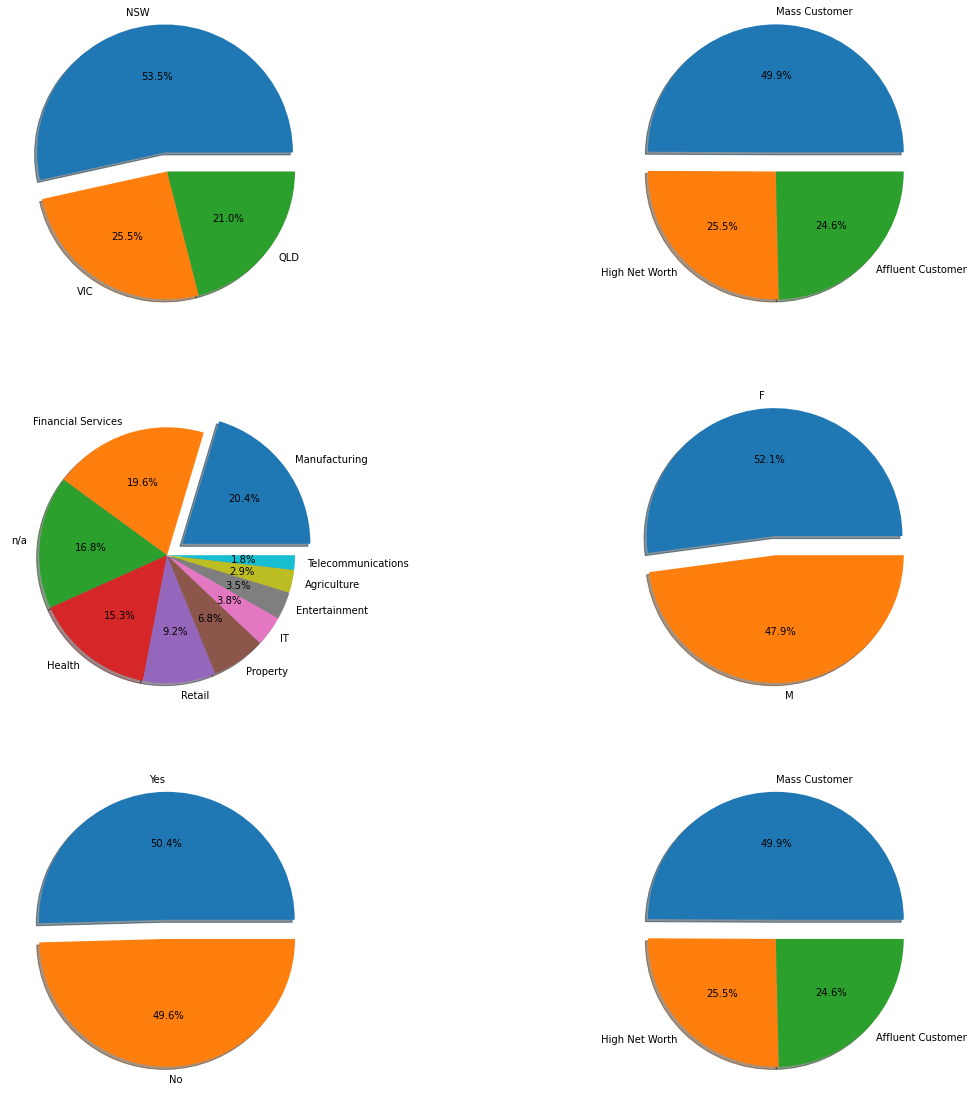

In [92]:
# Pie plots of categorical features
plt.subplots(nrows=3, ncols=2, figsize=(20,20))
for ind, cat in enumerate(['state', 'wealth_segment', 'job_industry_category', 'gender', 'owns_car','wealth_segment']):
    plt.subplot(3,2,ind+1)
    # plt.title(cat)
    aux = customer_list[cat].value_counts()
    explode=[0]*len(aux); explode[0]=0.15
    plt.pie(aux, labels=aux.index, shadow=True, explode=explode, autopct='%1.1f%%')
plt.show()

##### Age and property valuation distribution

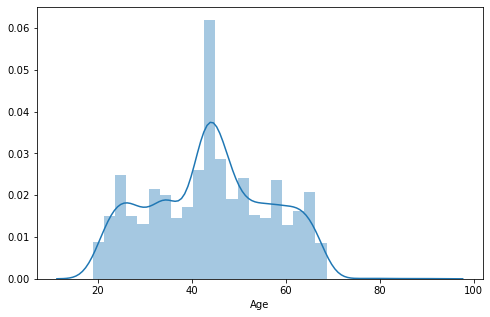

In [93]:
plt.figure(figsize=(8,5))
sns.distplot(customer_list.Age)
plt.show()

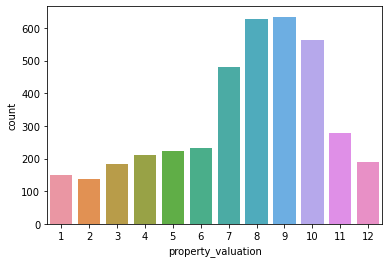

In [95]:
sns.countplot(customer_list.property_valuation)
plt.show()

______________

### What we are looking and how?

- Customers:
    - that spend money $\rightarrow$ mean profit by purchase
    - that buy a lot $\rightarrow$ count purchases
    - that buy nowadays $\rightarrow$ last month purchase
    - that has bough in the past (interest) $\rightarrow$ past 3 years purchases
    - that do not cancelled the purchase

##### Customers expenditure and frequency

In [94]:
# Mean profit by all customers in the master table
customer_list = customer_list.merge(df_transactions[['customer_id', 'profit']].groupby('customer_id', 
                                                                                       as_index = False).mean(), how='outer')
# Name column
customer_list.columns=list(customer_list.columns[:-1])+['expenditure']

customer_list = customer_list.merge(df_transactions[['customer_id', 'profit']].groupby('customer_id', 
                                                                                       as_index = False).count(), how='outer')
customer_list.columns=list(customer_list.columns[:-1])+['frequency']

In [95]:
# Percentiles
customer_list.iloc[:,-2:].describe()

,expenditure,frequency
count,3412.000000,3412.00000
mean,549.059643,5.66442
std,236.941969,2.31148
min,15.080000,1.00000
25%,384.636250,4.00000
50%,530.236667,6.00000
75%,695.196500,7.00000
max,1702.550000,14.00000


In [96]:
# Categorize features according to percentiles
customer_list['expenditure'] = pd.qcut(customer_list.expenditure, 4, labels=[1, 2, 3, 4])
customer_list['frequency'] = pd.qcut(customer_list.frequency, 4, labels=[1, 2, 3, 4])

##### Customers last purchase and number of past purchases

In [97]:
customer_list = customer_list.merge(df_transactions[['customer_id', 'month']].groupby('customer_id', 
                                                                                       as_index = False).max(), how='outer')
customer_list.columns=list(customer_list.columns[:-1])+['activity']

In [98]:
customer_list[['past_3_years_bike_related_purchases', 'activity']].describe()

,past_3_years_bike_related_purchases,activity
count,3908.000000,3412.000000
mean,49.030194,10.412954
std,28.778157,1.900882
min,0.000000,1.000000
25%,24.000000,10.000000
50%,48.000000,11.000000
75%,73.000000,12.000000
max,99.000000,12.000000


In [99]:
customer_list['past'] = pd.qcut(customer_list.past_3_years_bike_related_purchases, 4, labels=[1, 2, 3, 4])
customer_list.drop(columns='past_3_years_bike_related_purchases', inplace=True)

In [101]:
# Create status column
customer_list['status'] = ['inactive']*customer_list.shape[0]

# Activity percentiles shows that almost all the clients has bought recently. Therefore, instead of classifying according to 
# the last time they bough, it could be used classified according to the wealt segment if the client is, active, inactive, lost.
customer_list.loc[(customer_list.wealth_segment=='Mass Customer') & (customer_list.activity<=3), 'status'] = \
customer_list.loc[(customer_list.wealth_segment=='Mass Customer') & (customer_list.activity<=3), 'status'].replace('inactive',
                                                                                                                  value='lost')
customer_list.loc[(customer_list.wealth_segment=='Mass Customer') & (customer_list.activity>8), 'status'] = \
customer_list.loc[(customer_list.wealth_segment=='Mass Customer') & (customer_list.activity>8), 'status'].replace('inactive',
                                                                                                                value='active')

customer_list.loc[(customer_list.wealth_segment=='Affluent Customer') & (customer_list.activity<=5), 'status'] = \
customer_list.loc[(customer_list.wealth_segment=='Affluent Customer') & (customer_list.activity<=5), 'status'].replace(\
                                                                                                                'inactive',
                                                                                                                value='lost')
customer_list.loc[(customer_list.wealth_segment=='Affluent Customer') & (customer_list.activity>9), 'status'] = \
customer_list.loc[(customer_list.wealth_segment=='Affluent Customer') & (customer_list.activity>9), 'status'].replace(\
                                                                                                                'inactive',
                                                                                                                value='active')

customer_list.loc[(customer_list.wealth_segment=='High Net Worth') & (customer_list.activity<=6), 'status'] = \
customer_list.loc[(customer_list.wealth_segment=='High Net Worth') & (customer_list.activity<=6), 'status'].replace('inactive',
                                                                                                                  value='lost')
customer_list.loc[(customer_list.wealth_segment=='High Net Worth') & (customer_list.activity>10), 'status'] = \
customer_list.loc[(customer_list.wealth_segment=='High Net Worth') & (customer_list.activity>10), 'status'].replace('inactive',
                                                                                                                value='active')

In [102]:
# Drop previous column
customer_list.drop(columns=['activity'], inplace=True)

##### Fila NaNs and drop

In [103]:
customer_list

,customer_id,gender,job_industry_category,wealth_segment,owns_car,Age,state,property_valuation,expenditure,frequency,past,status
0,1,F,Health,Mass Customer,Yes,68,NSW,10,1,4,4,active
1,2,M,Financial Services,Mass Customer,Yes,41,NSW,10,4,1,4,inactive
2,4,M,IT,Mass Customer,No,60,QLD,9,1,1,2,inactive
3,5,F,n/a,Affluent Customer,Yes,44,NSW,4,2,2,3,active
4,6,M,Retail,High Net Worth,Yes,55,VIC,9,4,2,2,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...
3903,3995,M,Manufacturing,Mass Customer,Yes,46,NSW,12,NaN,NaN,4,inactive
3904,3996,F,Health,Mass Customer,No,46,VIC,6,NaN,NaN,1,inactive
3905,3997,F,Manufacturing,High Net Worth,Yes,20,NSW,2,NaN,NaN,4,inactive
3906,3999,M,Manufacturing,Affluent Customer,Yes,48,VIC,3,NaN,NaN,1,inactive


In [104]:
customer_list.loc[customer_list.frequency.isna(), 'status'] = \
customer_list.loc[customer_list.frequency.isna(), 'status'].replace('inactive', value='out')

customer_list['frequency'] = pd.to_numeric(customer_list.frequency, downcast='unsigned')
customer_list['expenditure'] = pd.to_numeric(customer_list.expenditure, downcast='unsigned')

In [105]:
customer_list.frequency.fillna(0, inplace=True)
customer_list.expenditure.fillna(0, inplace=True)

In [106]:
customer_list = customer_list.merge(df_transactions[['customer_id','online_order']].groupby('customer_id',
                                                                                            as_index=False).mean())

In [107]:
# Create indices to gather the ideal client
ind_expenditure = customer_list.expenditure>=2
ind_frequency = customer_list.frequency>=3
ind_past = customer_list.past>=3
ind_activity = customer_list.status == 'active'

In [108]:
df_ideal = customer_list.loc[ind_expenditure & ind_frequency & ind_past & ind_activity].drop(columns=['status', 'past',
                                                                                           'expenditure', 'frequency'])

In [109]:
df_ideal.reset_index(drop=True, inplace=True)


In [124]:
df_ideal.wealth_segment.value_counts(normalize=True)

Mass Customer        0.547215
Affluent Customer    0.256659
High Net Worth       0.196126
Name: wealth_segment, dtype: float64

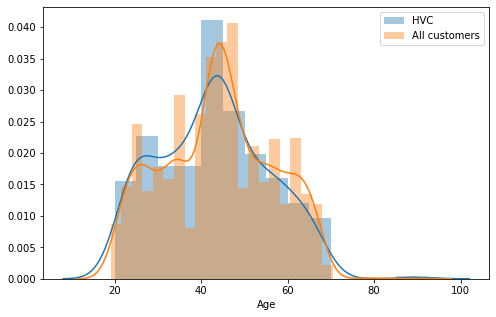

In [150]:
plt.figure(figsize=(8,5))
sns.distplot(df_ideal.Age, label='HVC')
sns.distplot(customer_list.Age, label='All customers')
plt.legend()
plt.show()

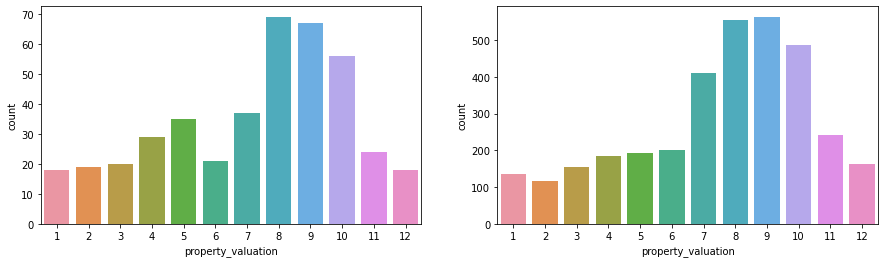

In [143]:
plt.subplots(nrows=1, ncols=2, figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(df_ideal.property_valuation, orient='h')
plt.subplot(1,2,2)
sns.countplot(customer_list.property_valuation, orient="h")
plt.show()

### Cancelled order status

In [112]:
df_transactions.order_status.value_counts()

Approved     19152
Cancelled      175
Name: order_status, dtype: int64

##### Is there any specific client that cancelled?

In [113]:
df_transactions.loc[df_transactions.order_status=='Cancelled'].customer_id.value_counts()

1726    2
2916    2
2852    2
1186    2
2073    2
       ..
190     1
926     1
2979    1
416     1
2048    1
Name: customer_id, Length: 170, dtype: int64

In [114]:
ind_cancelled = df_transactions.loc[df_transactions.order_status=='Cancelled'].customer_id.value_counts().sort_index().index

##### Do online purchases get more cancelled?

In [115]:
df_transactions.loc[df_transactions.order_status=='Cancelled'].online_order.value_counts()

1.0    97
0.0    78
Name: online_order, dtype: int64

##### Mean age that cancells?

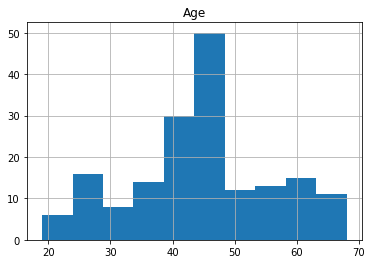

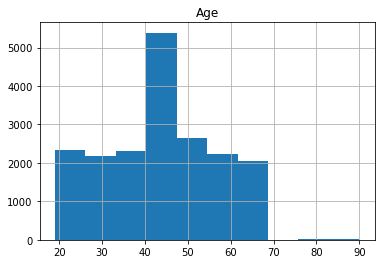

In [116]:
aux = pd.merge(df_transactions[['customer_id', 'order_status']],
         customer_list[['customer_id', 'Age']]).drop(columns=['customer_id'])
                                               
aux.loc[aux.order_status=='Cancelled'].hist()
aux.loc[aux.order_status=='Approved'].hist()
plt.show()

In [117]:
df_transactions.loc[df_transactions.order_status=='Cancelled', 'brand'].value_counts()

Solex             42
WeareA2B          30
Giant Bicycles    28
OHM Cycles        27
Trek Bicycles     24
Norco Bicycles    24
Name: brand, dtype: int64

In [118]:
customer_list.loc[customer_list.customer_id.isin(list(ind_cancelled))].frequency.value_counts()

4.0    60
2.0    58
3.0    27
1.0    25
Name: frequency, dtype: int64

In [119]:
customer_list.frequency.value_counts()

2.0    1159
1.0    1110
4.0     689
3.0     454
Name: frequency, dtype: int64

### Online shopping

##### Is online shopping more profitable?

In [120]:
pd.pivot_table(df_transactions, index='online_order', values='profit', aggfunc=['mean', 'median'])

,mean,median
,profit,profit
online_order,,
0.0,553.053423,445.21
1.0,548.363752,445.21


##### Do people buy more online or in the store?

In [121]:
df_transactions.online_order.value_counts()

1.0    9708
0.0    9619
Name: online_order, dtype: int64

##### Do people with car buy more in the store?

In [122]:
pd.merge(df_transactions[['customer_id', 'online_order']],
         customer_list[['customer_id', 'owns_car']]).drop(columns=['customer_id']).groupby(['online_order',
                                                                                           'owns_car']).size()

online_order  owns_car
0.0           No          4813
              Yes         4806
1.0           No          4816
              Yes         4892
dtype: int64